<a href="https://colab.research.google.com/github/asmazullo/learnpython/blob/main/Analise_COVID_by_Alex_Mazullo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Painel independente Covid Profissões versus internações em UTI**<br>
[<font color="red">covid Alert</font>](https://www.google.com/search?q=coronavirus&hl=en&sa=X&ved=2ahUKEwiv7pub84vwAhWQjJUCHVSSC1oQj-8FegQIARAY)
#author: Alex Mazullo<br>
asmazullo@gmail.com
___
**Fonte de dados:**<br>
Banco de Dados de Síndrome Respiratória Aguda Grave - incluindo dados da COVID-19<br>
https://opendatasus.saude.gov.br/dataset/bd-srag-2020<br>

<a href="https://opendatasus.saude.gov.br/dataset/ae90fa8f-3e94-467e-a33f-94adbb66edf8/resource/8f571374-c555-4ec0-8e44-00b1e8b11c25/download/dicionario-de-dados-srag-hospitalizado-27.07.2020-final.pdf">Clique aqui para download do dicionário de Dados</a>

<a href="https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/SRAG/2020/INFLUD-12-04-2021.csv">Clique aqui para download do arquivo CSV</a>

---
**Metodologia utilizada**<br>
Nesta análise eu procurei entender qual a taxa de internação em UTI por tipo de profissão.<br>
1) primeiramente isolei a coluna que indica internação em UTI e filtrei apenas os registros que tiveram internação.<br>
2) Depois disso eu limpei todos os registros sem informação de profissão.<br>
3) Fiz trê análises:<br>
a. Número de internações em UTI por profissão<br>
b. Número de infectados por profissão independente de internação<br>
c. Número de óbitos por profissão.<br>
4)O resultado pode ser visto abaixo:



##Passo 1: importação da biblioteca Pandas

In [ ]:
#Primeiro vamos importar o pandas
import pandas as pd

##Passo 2: agora vamos definir o arquivo.<br>
Aqui eu faço uma conexão ao meu google drive onde eu fiz upload do arquivo.  Mas você pode fazer uload para o próprio ambiente do colab se quiser.  Basta especificar o caminho do arquivo abaixo na variável path:<br>
`/content/nome.csv`

In [ ]:
#fazendo conexão com meu google drive.  Se o arquivo estiver no seu google drive você pode fazer o mesmo
from google.colab import drive
#ao executar a linha abaixo será informado um link. 
#ao clicar no link ele pedirá sua autenticação no google e te informara um código.
#este código deve ser inserio no campo que será aberto aqui no colab
drive.mount("/content/gdmazullo")


Mounted at /content/gdmazullo


In [ ]:
#agora é só informar a pasta:
path = "/content/gdmazullo/MyDrive/Documentos/conhecimento/Python/INFLUD-12-04-2021.csv"

##Passo 3: Este comando lê o arquivo CSV.<br>
Durante esta atividade o colab apresentou diversos erros e reiniciou.  Provavelmente pelo tamanho do arquivo e erros de encoding.<br>
A melhor configuração para ler o arquivo foi com engine python e não C.  Embora mais lenta o resultado foi melhor e com menos erros.

In [ ]:
df = pd.read_csv(path, encoding='utf-8', sep=';', engine='python')
#df = pd.read_csv(path, encoding='utf-8', header=None, sep=';', engine='python')

###Abaixo podemos ver uma prévia do arquivo lido

In [ ]:
#aqui podemos ver uma prévia do arquivo:
df.head(3)


,DT_NOTIFIC,SEM_NOT,DT_SIN_PRI,SEM_PRI,SG_UF_NOT,ID_REGIONA,CO_REGIONA,ID_MUNICIP,CO_MUN_NOT,ID_UNIDADE,CO_UNI_NOT,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,COD_IDADE,CS_GESTANT,CS_RACA,CS_ETINIA,CS_ESCOL_N,ID_PAIS,CO_PAIS,SG_UF,ID_RG_RESI,CO_RG_RESI,ID_MN_RESI,CO_MUN_RES,CS_ZONA,SURTO_SG,NOSOCOMIAL,AVE_SUINO,FEBRE,TOSSE,GARGANTA,DISPNEIA,DESC_RESP,SATURACAO,DIARREIA,VOMITO,OUTRO_SIN,...,HISTO_VGM,PAIS_VGM,CO_PS_VGM,LO_PS_VGM,DT_VGM,DT_RT_VGM,PCR_SARS2,PAC_COCBO,PAC_DSCBO,OUT_ANIM,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,TOMO_RES,TOMO_OUT,DT_TOMO,TP_TES_AN,DT_RES_AN,RES_AN,POS_AN_FLU,TP_FLU_AN,POS_AN_OUT,AN_SARS2,AN_VSR,AN_PARA1,AN_PARA2,AN_PARA3,AN_ADENO,AN_OUTRO,DS_AN_OUT,TP_AM_SOR,SOR_OUT,DT_CO_SOR,TP_SOR,OUT_SOR,DT_RES,RES_IGG,RES_IGM,RES_IGA
0,10/02/2020,7,07/02/2020,6,BA,NUCLEO REGIONAL DE SAUDE LESTE,1380.0,SALVADOR,292740,HOSPITAL SANTA ISABEL,3832,M,05/09/2017,2,3,3002,6,4.0,NaN,5.0,BRASIL,1,BA,NUCLEO REGIONAL DE SAUDE LESTE,1380.0,SALVADOR,292740.0,NaN,NaN,2.0,2.0,1.0,1.0,9.0,1.0,1.0,2.0,2.0,2.0,2.0,...,1,ESPANHA,44.0,BELLVIS,15/01/2020,07/02/2020,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,6.0,NaN,NaN,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11/02/2020,7,08/02/2020,6,SP,GVE XVII CAMPINAS,1342.0,CAMPINAS,350950,HOSPITAL VERA CRUZ,2078376,F,26/03/2019,11,2,2011,6,1.0,NaN,5.0,BRASIL,1,SP,GVE XXVI SAO JOAO DA BOA VISTA,1350.0,MOJI MIRIM,353080.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,...,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,10/02/2020,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29/01/2020,5,25/01/2020,4,PA,11 REGIONAL DE PROTECAO SOCIAL,1494.0,PARAUAPEBAS,150553,HOSPITAL GERAL DE PARAUAPEBAS MANOEL EVALDO BE...,2615746,F,26/12/2002,17,3,3017,9,4.0,NaN,3.0,BRASIL,1,PA,11 REGIONAL DE PROTECAO SOCIAL,1494.0,PARAUAPEBAS,150553.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#O arquivo possui 154 campos e 1190744 registros
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190745 entries, 0 to 1190744
Columns: 154 entries, DT_NOTIFIC to RES_IGA
dtypes: float64(87), int64(9), object(58)
memory usage: 1.4+ GB


In [ ]:
df.keys()

Index(['DT_NOTIFIC', 'SEM_NOT', 'DT_SIN_PRI', 'SEM_PRI', 'SG_UF_NOT',
       'ID_REGIONA', 'CO_REGIONA', 'ID_MUNICIP', 'CO_MUN_NOT', 'ID_UNIDADE',
       ...
       'DS_AN_OUT', 'TP_AM_SOR', 'SOR_OUT', 'DT_CO_SOR', 'TP_SOR', 'OUT_SOR',
       'DT_RES', 'RES_IGG', 'RES_IGM', 'RES_IGA'],
      dtype='object', length=154)

##Campos para análise:
Depois do arquivo importado podemos fazer a análise.

No dicionário de dados podemos pegar os campos relativos a UTI e ocupação de acorco com o CBO:<br>

*PAC_DSCBO<br>
UTI - valor 1 para internado em UTI<br>
EVOLUCAO - valor 1 para óbito*


In [ ]:
df['PAC_DSCBO']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
1190740    NaN
1190741    NaN
1190742    NaN
1190743    NaN
1190744    NaN
Name: PAC_DSCBO, Length: 1190745, dtype: object

In [ ]:
# De acordo com o docionário de dados
#1-Cura
#2-Óbito
#3- Óbito por outras causas
#9-Ignorado

df['EVOLUCAO']

61         1.0
119        1.0
126        1.0
259        2.0
401        2.0
          ... 
1190521    3.0
1190531    3.0
1190586    2.0
1190692    NaN
1190696    1.0
Name: EVOLUCAO, Length: 25740, dtype: float64

In [ ]:
# De acordo com o docionário de dados
#1-Sim
#2-Não
#9-Ignorado

df['UTI']

0          2.0
1          1.0
2          1.0
3          2.0
4          1.0
          ... 
1190740    2.0
1190741    NaN
1190742    1.0
1190743    NaN
1190744    2.0
Name: UTI, Length: 1190745, dtype: float64

##Passo 4: Precisamos agora limpar todos os registros do campo ocupação que não estão em branco.<br>
Posteriormente vou fazer outro filtro para retirar os regsitros contendo NÃO INFORMADO para  profissão

In [ ]:
#limpando os dados em branco da coluna que contém as profissoes
df = df.dropna(subset=['PAC_DSCBO'])

In [ ]:
df['PAC_DSCBO']

61                       MEDICO CLINICO
119          MOTORISTA DE ONIBUS URBANO
126              MEDICO CIRURGIAO GERAL
259               COMERCIANTE VAREJISTA
401                       NAO INFORMADO
                       ...             
1190521                      ENFERMEIRO
1190531    AGENTE DE COMBATE A ENDEMIAS
1190586            FOTOGRAFO RETRATISTA
1190692                        ADVOGADO
1190696           TECNICO DE ENFERMAGEM
Name: PAC_DSCBO, Length: 25740, dtype: object

In [ ]:
#A coluna 76 mostra se a pessoa foi para UTI ou não
#1 foi para UTI 2- não foi e 9 - ignorado
df['UTI']


61         NaN
119        2.0
126        1.0
259        2.0
401        2.0
          ... 
1190521    2.0
1190531    1.0
1190586    2.0
1190692    1.0
1190696    1.0
Name: UTI, Length: 25740, dtype: float64

##Passo 5: Agora vamos filtrar somente os registros onde o campo UTI é igual a 1: Foi internado<br>
De acordo com o dicionário de dados temos:<br>
1 - foi internado<br>
2 - não foi internado<br>
9 - sem informação sobre internação<br>

___
Neste mesmo filtro também vou retirar todos os registros com CBO igual a "NÃO INFORMADO"

In [ ]:
df_foiuti=df[(df['UTI']==1) & (df['PAC_DSCBO']!='NAO INFORMADO')]

Abaixo temos a contagem de quantas pessoas estão nesta amostra:

In [ ]:
df_foiuti['PAC_DSCBO'].count()

6441

##Passo 6 - abaixo temos o resultado de internações UTI por profissão
listei as 30 profissoes com maior número de inernações em UTI dentre as 6441 pessoas da amostra pesquisada.<br>
Abaixo a lista e o gráfico por profissões

In [ ]:
df_foiuti['PAC_DSCBO'].value_counts(dropna=True).head(30)

TRABALHADOR VOLANTE DA AGRICULTURA                                                            549
TRABALHADOR AGROPECUARIO EM GERAL                                                             291
COMERCIANTE VAREJISTA                                                                         257
PEDREIRO                                                                                      231
TECNICO DE ENFERMAGEM                                                                         169
EMPREGADO  DOMESTICO  NOS SERVICOS GERAIS                                                     154
ADVOGADO                                                                                      150
COZINHEIRO DO SERVICO DOMESTICO                                                               145
MOTORISTA DE CARRO DE PASSEIO                                                                 144
REPRESENTANTE COMERCIAL AUTONOMO                                                              132
ADMINISTRADOR       

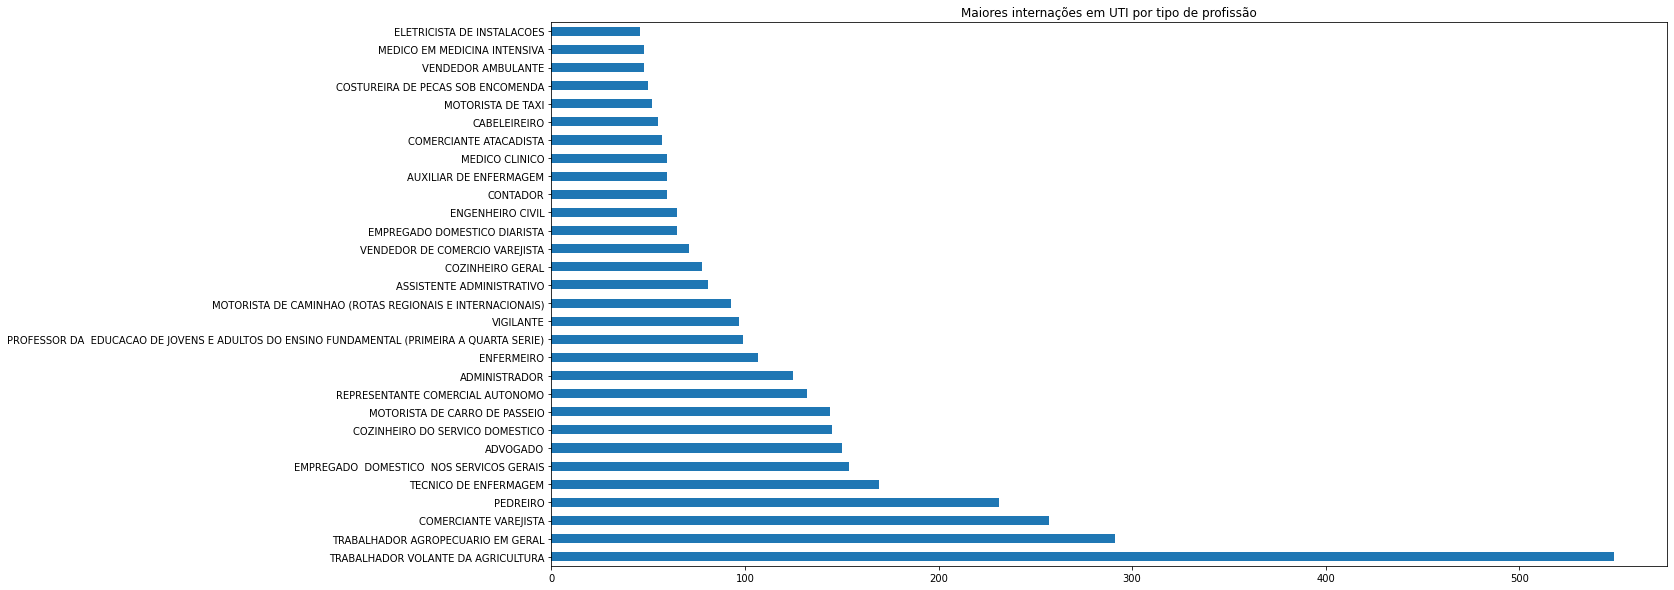

In [ ]:
df_foiuti['PAC_DSCBO'].value_counts(dropna=True).head(30).plot(kind='barh', figsize=(20,10), title="Maiores internações em UTI por tipo de profissão", sort_columns=True)

##Passo 7 - Infectados por profissão independente de internação
Abaixo a lista e o gráfico por profissões<br>
Vou também fazer uma relação geral de pessoas infectadas por profissão, independente de ter ido para UTI ou não.

In [ ]:
#criando dataframe com todos que informaram a profissão:
df_informouprofissao=df[(df['PAC_DSCBO']!='NAO INFORMADO')]



In [27]:
df_informouprofissao['PAC_DSCBO'].count()

22651

In [ ]:
#fazendo a limpeza dos dados NA e coletando os valores dos 30 primeiros
df_informouprofissao['PAC_DSCBO'].value_counts(dropna=True).head(30)

TRABALHADOR VOLANTE DA AGRICULTURA                                                            2076
TRABALHADOR AGROPECUARIO EM GERAL                                                             1021
TECNICO DE ENFERMAGEM                                                                          866
COMERCIANTE VAREJISTA                                                                          708
PEDREIRO                                                                                       703
ENFERMEIRO                                                                                     625
EMPREGADO  DOMESTICO  NOS SERVICOS GERAIS                                                      612
PROFESSOR DA  EDUCACAO DE JOVENS E ADULTOS DO ENSINO FUNDAMENTAL (PRIMEIRA A QUARTA SERIE)     453
MOTORISTA DE CARRO DE PASSEIO                                                                  425
ADVOGADO                                                                                       405
REPRESENTA

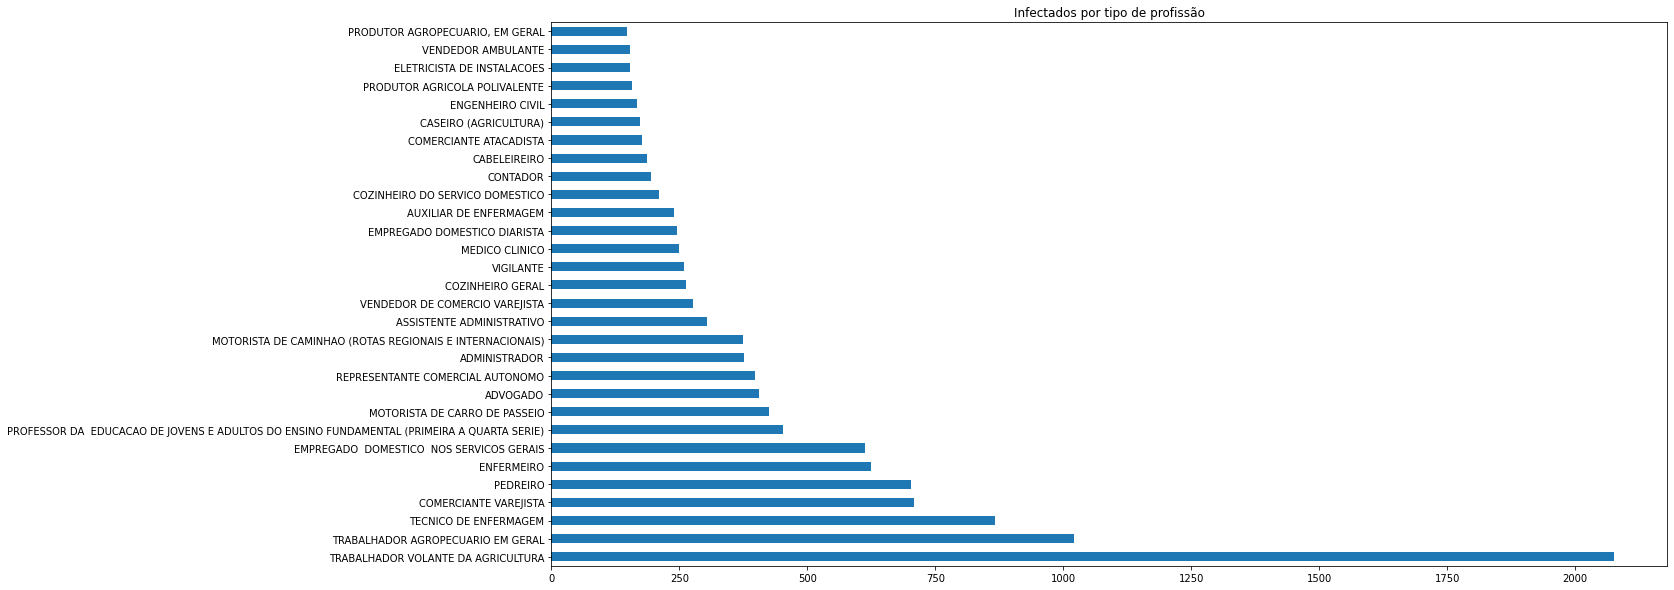

In [ ]:
#Plotando o Gráfico:
df_informouprofissao['PAC_DSCBO'].value_counts(dropna=True).head(30).plot(kind='barh', figsize=(20,10), title="Infectados por tipo de profissão", sort_columns=True)

##Passo 8 - Óbitos por profissão independente de internação
Abaixo a lista de óbitos por profissões<br>
Vou também fazer uma relação geral de pessoas infectadas por profissão, independente de ter ido para UTI ou não.

In [ ]:
df_obitos=df[(df['EVOLUCAO']==2) & (df['PAC_DSCBO']!='NAO INFORMADO')]


In [28]:
df_obitos['PAC_DSCBO'].count()

7236

In [ ]:
df_obitos['PAC_DSCBO'].value_counts(dropna=True).head(30)

TRABALHADOR VOLANTE DA AGRICULTURA                                                            935
TRABALHADOR AGROPECUARIO EM GERAL                                                             433
PEDREIRO                                                                                      337
COMERCIANTE VAREJISTA                                                                         268
EMPREGADO  DOMESTICO  NOS SERVICOS GERAIS                                                     210
REPRESENTANTE COMERCIAL AUTONOMO                                                              180
MOTORISTA DE CARRO DE PASSEIO                                                                 166
PROFESSOR DA  EDUCACAO DE JOVENS E ADULTOS DO ENSINO FUNDAMENTAL (PRIMEIRA A QUARTA SERIE)    140
VIGILANTE                                                                                     122
TECNICO DE ENFERMAGEM                                                                         116
COZINHEIRO GERAL    

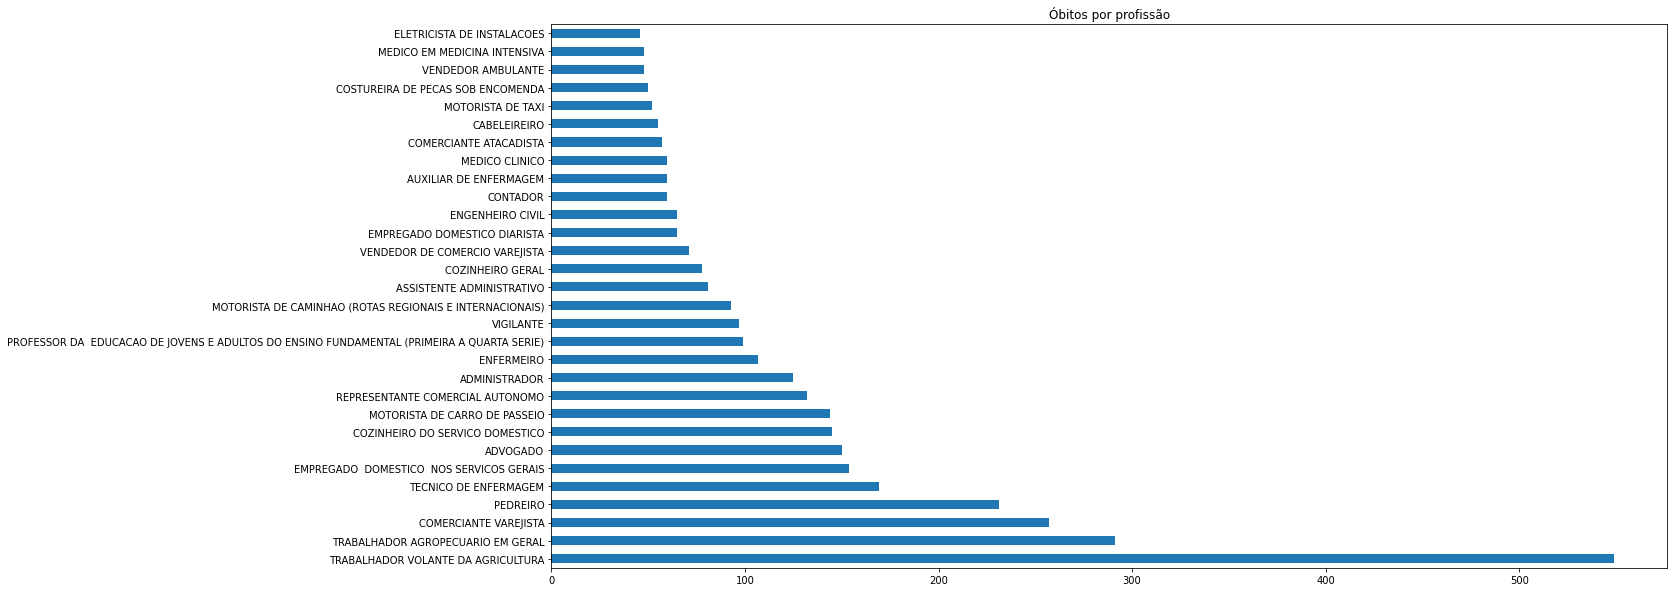

In [ ]:
df_foiuti['PAC_DSCBO'].value_counts(dropna=True).head(30).plot(kind='barh', figsize=(20,10), title="Óbitos por profissão", sort_columns=True)

##Sobre a Amostra:
A amostra é válida pois temos:<br>
População pesquisada: 1.190.744<br>
Amostra: 6441<br>
margem de erro de 1,03%

##Conclusão:
De acordo com os dados analisados e com a metodologia seguida, os trabalhadores rurais foram os mais afetados pela pendemia de COVID-19.  Foram os que tiveram maior número de infeção, maior número de internação e maior número de mortes.

###Abaixo alguns estudos relacionando a raça

In [ ]:
df_foiuti=df[(df['UTI']==1) & (df['CS_RACA']!=9) ]

In [ ]:
df_foiuti['CS_RACA'].value_counts(dropna=True).head(5)

1.0    47667
4.0    37861
2.0     5581
3.0     1286
5.0      194
Name: CS_RACA, dtype: int64

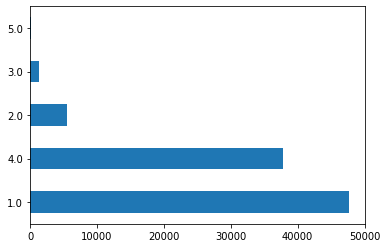

In [ ]:
df_foiuti['CS_RACA'].value_counts(dropna=True).head(5).plot(kind='barh')

In [ ]:
dfmorte =df[(df['EVOLUCAO']==2) & (df['CS_RACA']!=9) ]

In [ ]:
dfmorte['CS_RACA'].value_counts(dropna=True).head(5)

1.0    39765
4.0    38076
2.0     5796
3.0     1203
5.0      302
Name: CS_RACA, dtype: int64

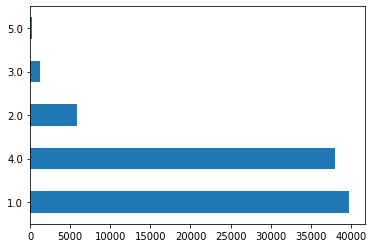

In [ ]:
dfmorte['CS_RACA'].value_counts(dropna=True).head(5).plot(kind='barh')
